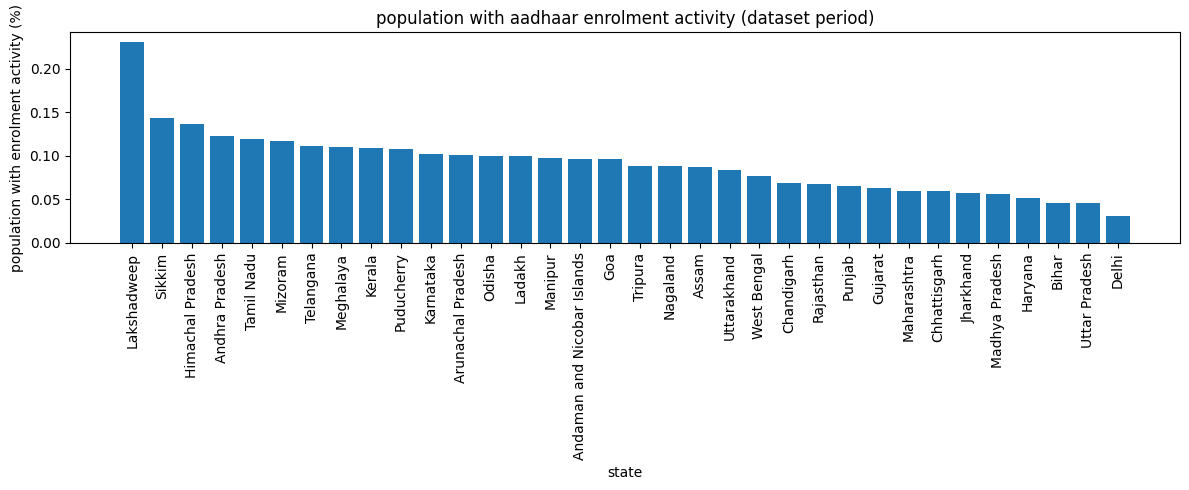

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- enrolment activity ----------------

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .rename("enrolment_events")
    .reset_index()
)

# ---------------- population ----------------

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})

population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# ---------------- merge ----------------

df=enrolments.merge(population,on="state",how="inner")

# ---------------- corrected metric ----------------
# % of population with enrolment activity in dataset period

df["population_activity_percent"]=(df["enrolment_events"]/df["population"])*100
df=df.sort_values("population_activity_percent",ascending=False)

# ---------------- plot ----------------

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["population_activity_percent"])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("population with enrolment activity (%)")
plt.title("population with aadhaar enrolment activity (dataset period)")
plt.tight_layout()
plt.show()
